 # Table of contents

>[Table of contents](#scrollTo=84E5Xp9ybF4V)

>[Loading the data](#scrollTo=GqYXegbdNi19)

>[EDA](#scrollTo=2ehvlZHkj_rg)

>>[Basic steps](#scrollTo=pm-evle1hQsV)

>>[Label Encoding categorical variables](#scrollTo=uJg50WyAOfDH)

>>[Important Note](#scrollTo=zzdnUcKWSDmk)

>>[One-hot encoding of categorical variables](#scrollTo=tS7Rs_i8nrkx)

>>[Back to Exploratory Data Analysis](#scrollTo=iSg243ZfpLOa)

>>[Null values visualization](#scrollTo=Ml23rL6-N9df)

>>[Filling null values with insight knowledge](#scrollTo=42DPDNVNwvhS)

>>>[own_car_age column](#scrollTo=CheBDLfYROBE)

>>>[flag own realty](#scrollTo=q2BxEihQRWj6)

>>>[box plots](#scrollTo=mKNQjZQ7Ygyi)

>>[Filling nan values  with median](#scrollTo=8LdaflSYC9rC)

>>[Missingo visualization](#scrollTo=PVPoWQFCwcHJ)

>>[Correlations](#scrollTo=LZ_hOjCbpb8t)

>>[Feature engineering](#scrollTo=x-5ibwOhmFTZ)

>[Applying the models](#scrollTo=vquegavf3UfG)

>>[Preprocssing of data and Plot functions](#scrollTo=FuGjlJgLdUJP)

>>[LogisticRegression](#scrollTo=NAogaGK3cUok)

>>[Random forest](#scrollTo=Bmc8Q1WYKcbd)

>>[Ensemble models](#scrollTo=iJuzYQRaSJbz)

>>>[Bagging and Pasting](#scrollTo=7JKa1rbXqPSG)

>>[Boosting](#scrollTo=LbbZQkfrzvno)

>>>[Adaboost](#scrollTo=vJxlmg8FAKYp)

>>>[Gradient Boosting](#scrollTo=0VbzemxL-l7a)

>>>[Xg boost](#scrollTo=50RRfhA49Nsf)

>>[Neural Network/MLP](#scrollTo=Aod0bSBn-bfI)

>>[Voting Classifiers](#scrollTo=MdqWdc0e_YKT)

>>>[Voting classifer with best performing algos](#scrollTo=Yn0SXE2aHwus)

>>[Stacking](#scrollTo=8pe7q7XpDUIo)

>>[Light Gradient Boosting Machine](#scrollTo=jgUUzUEc_deK)



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import warnings
warnings.simplefilter('ignore')

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


%matplotlib inline

# Loading the data

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [4]:
file_list = drive.ListFile({'q': "'1u_fgKv9X_SK13GmlpVMlgVBaIrM2KtSH' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))



title: bureau_balance.csv, id: 1hsZkfJwEsj56JBbcUkSRNzJdH6r8JPpz
title: bureau.csv, id: 17c4Zye3nhG0pK74iGtgt-C9lt8Le_a6Y
title: application_train.csv, id: 1n_pWuiSPtQQvKxcTu6QMTIYAQdO1nIvl
title: application_test.csv, id: 10I2Ifn17KX3lXtbIdThE7wVqqHg0Y_Yr
title: sample_submission.csv, id: 1tRkrFzTCmcslemhcwN7sop2Umn3OVlob
title: HomeCredit_columns_description.csv, id: 1DXznSRde8xRe7cvJ17Q3Z6BWHDnkXB5I


In [0]:
train_downloaded = drive.CreateFile({'id': '1n_pWuiSPtQQvKxcTu6QMTIYAQdO1nIvl'})
train_downloaded.GetContentFile('application_train.csv')
test_downloaded = drive.CreateFile({'id': '10I2Ifn17KX3lXtbIdThE7wVqqHg0Y_Yr'})
test_downloaded.GetContentFile('application_test.csv')

In [0]:
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')

In [0]:
description = drive.CreateFile({'id': '1DXznSRde8xRe7cvJ17Q3Z6BWHDnkXB5I'})
description.GetContentFile('HomeCredit_columns_description.csv')
description = pd.read_csv('HomeCredit_columns_description.csv',encoding = 'unicode_escape')

In [8]:
description.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [0]:
description = description.drop(columns='Unnamed: 0',axis = 1)


In [10]:
description.head()

,Table,Row,Description,Special
0,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


## Evaluation matrix

![alt text](https://)

# EDA


## Basic steps

In [11]:
#number of data types
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [12]:
#columns in the dataset
columns = train.columns.tolist()
columns

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [0]:
#columns names to lower case in both test and train
train.rename(str.lower, axis='columns',inplace=True,copy=True)
test.rename(str.lower, axis='columns',inplace=True,copy=True)

In [14]:
#categorical data type
cat_cols = train.select_dtypes(include='object').columns.tolist()
print('There are '+str(len(cat_cols))+' object columns, and the name of the columns are ')
cat_cols

There are 16 object columns, and the name of the columns are 


['name_contract_type',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'occupation_type',
 'weekday_appr_process_start',
 'organization_type',
 'fondkapremont_mode',
 'housetype_mode',
 'wallsmaterial_mode',
 'emergencystate_mode']

In [15]:
#finding the unique data values in the order columns
train.select_dtypes(include='object').apply(pd.Series.nunique,axis = 0)  #unique giving error here why?????????

name_contract_type             2
code_gender                    3
flag_own_car                   2
flag_own_realty                2
name_type_suite                7
name_income_type               8
name_education_type            5
name_family_status             6
name_housing_type              6
occupation_type               18
weekday_appr_process_start     7
organization_type             58
fondkapremont_mode             4
housetype_mode                 3
wallsmaterial_mode             7
emergencystate_mode            2
dtype: int64

In [0]:
#train.select_dtypes(include='object').apply(pd.Series.unique,axis = 0)

In [17]:
#train['code_gender'].value_counts() 
for c in cat_cols:
  values = train[c].value_counts()

  print('The unique values in the '+str.upper(c) +' are ' + str(len(values)))
  print(values)
  print('--------------------------------------------')
  
  

The unique values in the NAME_CONTRACT_TYPE are 2
Cash loans         278232
Revolving loans     29279
Name: name_contract_type, dtype: int64
--------------------------------------------
The unique values in the CODE_GENDER are 3
F      202448
M      105059
XNA         4
Name: code_gender, dtype: int64
--------------------------------------------
The unique values in the FLAG_OWN_CAR are 2
N    202924
Y    104587
Name: flag_own_car, dtype: int64
--------------------------------------------
The unique values in the FLAG_OWN_REALTY are 2
Y    213312
N     94199
Name: flag_own_realty, dtype: int64
--------------------------------------------
The unique values in the NAME_TYPE_SUITE are 7
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: name_type_suite, dtype: int64
--------------------------------------------
The unique values in the NAME_INCOME_TYPE ar

Obs ------ 

*   Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables!

*   XNA type need to be removed



## Label Encoding categorical variables

In [18]:
object_cols =[]
for col in train:
  if train[col].dtype =='object':
    if len(list(train[col].unique())) <= 2:
      object_cols.append(col)
object_cols     

['name_contract_type', 'flag_own_car', 'flag_own_realty']

obs --


1.   Add gender into it as unique is considering xna as a value "na"




In [19]:
object_cols.append('code_gender')
train[object_cols].describe()

,name_contract_type,flag_own_car,flag_own_realty,code_gender
count,307511,307511,307511,307511
unique,2,2,2,3
top,Cash loans,N,Y,F
freq,278232,202924,213312,202448


In [20]:
train['code_gender'] = train['code_gender'].replace(['XNA'],'F')
train[object_cols].describe()

,name_contract_type,flag_own_car,flag_own_realty,code_gender
count,307511,307511,307511,307511
unique,2,2,2,2
top,Cash loans,N,Y,F
freq,278232,202924,213312,202452



Label Encoding and One-Hot Encoding

Let's implement the policy described above: for any categorical variable (dtype == object) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding.

For label encoding, we use the Scikit-Learn LabelEncoder and for one-hot encoding, the pandas get_dummies(df) function.


In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le_count = 0

for col in object_cols:
  le.fit(train[col])
  # transform data
  train[col] = le.transform(train[col])
  test[col] = le.transform(test[col])
  le_count += 1
            
print("Total " + str(le_count)+" columns are label encoded" ) 

Total 4 columns are label encoded


## ** Important Note**

1.   df[col].unique()) and df[col].nunique(). 
  The first counts nan as one of the unique values while the second does not. Therefore, the first method will show one more than the second if there is a nan value in the column
2.   df[col].value_counts() ==== does not count nanas unique values by default



In [22]:
train['emergencystate_mode'].value_counts()

No     159428
Yes      2328
Name: emergencystate_mode, dtype: int64

In [23]:
train['emergencystate_mode'].describe()

count     161756
unique         2
top           No
freq      159428
Name: emergencystate_mode, dtype: object

In [24]:
train['emergencystate_mode'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [25]:
miss_values = train['emergencystate_mode'].isna().sum()
#train['emergencystate_mode'].isnull().sum()
# both will give same values
print('Total missing values are '+str(miss_values))

miss_val = pd.Series(train['emergencystate_mode'].isna().sum())
miss_val_per = pd.Series( 100 * train['emergencystate_mode'].isna().sum() / len(train))
# Make a table with the results
miss_val_table = pd.concat([miss_val, miss_val_per], axis=1)
# Rename the columns
miss_val_table = miss_val_table.rename( columns = {0 : 'Missing Values', 1 : '% of Total Values'})

miss_val_table



Total missing values are 145755


,Missing Values,% of Total Values
0,145755,47.398304


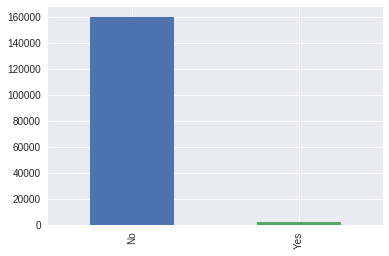

In [26]:
train['emergencystate_mode'].value_counts().plot.bar()
plt.show()

Obs----


**1.   emergency mode has many nan valuescan't convert them blindly**



## One-hot encoding of categorical variables

In [0]:
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

In [28]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 229)
Testing Features shape:  (48744, 226)



**Aligning Training and Testing Data **

There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set axis = 1 to align the dataframes based on the column not on the rows.


In [29]:
# storing the target values in df
train_labels = train['target']


# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = train.align(test, join = 'inner', axis = 1)

# Add the target back in
app_train['target'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 227)
Testing Features shape:  (48744, 226)


## Back to Exploratory Data Analysis

** The number of features are very large in number need to be clamp down**

In [30]:
app_train['days_birth'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: days_birth, dtype: float64

In [31]:
app_train['days_birth'] = abs(app_train['days_birth'] ) / 365
app_test['days_birth'] = abs(app_test['days_birth']) / 365
app_train['days_birth'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: days_birth, dtype: float64

In [32]:
#exploring the days employed column
app_train['days_employed'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: days_employed, dtype: float64

This doesn't look right the max value is too much and some values are negative . This values may implies that how long a person has been employed before applying loan or he has been employed before applying for loan. Or the max value seems to be way too high almost 1000 years.

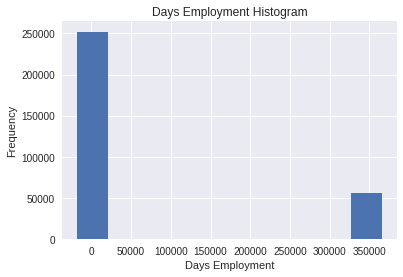

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

app_train['days_employed'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

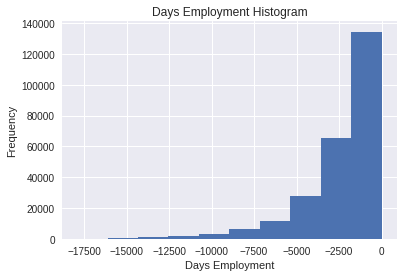

In [34]:
# As read in the discussion section the 565243 value is nan infinite values so need to be replaced in both train and test sets
app_train['days_employed'].replace({365243: np.nan}, inplace = True) 
app_test['days_employed'].replace({365243: np.nan}, inplace = True) 

app_train['days_employed'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [0]:
#couting categorical and numerical features
def dtypes(df):
  
  categorical_list = []
  numerical_list = []
  for i in df.columns.tolist():
    if df[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
  print('Number of categorical features:', str(len(categorical_list)))
  print('Number of numerical features:', str(len(numerical_list)))

In [36]:
dtypes(app_train)
dtypes(app_test)

Number of categorical features: 0
Number of numerical features: 227
Number of categorical features: 0
Number of numerical features: 226


In [0]:
# Function to calculate missing values by column# Funct 

def missing_values_table(df):
  col_list = []
  # Total missing values
  mis_val = df.isnull().sum()

  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)

  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

  # Rename the columns
  mis_val_table = mis_val_table.rename( columns = {0 : 'Missing Values', 1 : '% of Total Values'})

  # Sort the table by percentage of missing descending
  mis_val_table = mis_val_table[mis_val_table.iloc[:,1] > 25].sort_values('% of Total Values', ascending=False).round(6)

  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table.shape[0]) + " columns that have missing values greater than 25%.")    
  # Return the dataframe with missing information

  # print(mis_val_table.index)
  return mis_val_table


In [38]:
missing_values = missing_values_table(app_train)
missing_values.head()

Your selected dataframe has 227 columns.
There are 45 columns that have missing values greater than 25%.


,Missing Values,% of Total Values
commonarea_medi,214865,69.872297
commonarea_avg,214865,69.872297
commonarea_mode,214865,69.872297
nonlivingapartments_mode,213514,69.432963
nonlivingapartments_medi,213514,69.432963


In [39]:
# Missing values statistics
missing_values = missing_values_table(app_test)
missing_values.head()

Your selected dataframe has 226 columns.
There are 45 columns that have missing values greater than 25%.


,Missing Values,% of Total Values
commonarea_medi,33495,68.716150
commonarea_mode,33495,68.716150
commonarea_avg,33495,68.716150
nonlivingapartments_mode,33347,68.412523
nonlivingapartments_medi,33347,68.412523


In [40]:
app_train = app_train.replace("nan",np.nan)
app_test = app_test.replace("nan",np.nan)

# getting the missing columns data
m_col = list(missing_values.index)
m_data = app_train[m_col]
m_data.head()

,commonarea_medi,commonarea_mode,commonarea_avg,nonlivingapartments_mode,nonlivingapartments_medi,nonlivingapartments_avg,livingapartments_medi,livingapartments_avg,livingapartments_mode,floorsmin_mode,...,livingarea_avg,livingarea_medi,floorsmax_mode,floorsmax_medi,floorsmax_avg,years_beginexpluatation_medi,years_beginexpluatation_mode,years_beginexpluatation_avg,totalarea_mode,ext_source_1
0,0.0144,0.0144,0.0143,0.0,0.0000,0.0000,0.0205,0.0202,0.022,0.1250,...,0.0190,0.0193,0.0833,0.0833,0.0833,0.9722,0.9722,0.9722,0.0149,0.083037
1,0.0608,0.0497,0.0605,0.0,0.0039,0.0039,0.0787,0.0773,0.079,0.3333,...,0.0549,0.0558,0.2917,0.2917,0.2917,0.9851,0.9851,0.9851,0.0714,0.311267
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Null values visualization


In [0]:
X_train = app_train.copy()
X_test = app_test.copy()

In [0]:
def null_counter(df,value):
  labels = []
  values = []
  na_dict = {}
  for col in df.columns:
    missing_values = df[col].isnull().sum()
    per_missing_values = round(missing_values/len(df) * 100,3)
    if per_missing_values > value: #  % of values greater than specific values %
      labels.append(col)
      values.append(float(per_missing_values))
      na_dict[col] = per_missing_values
  print('columns having na values greater than %s are ' %value + str(len(labels)))
  return na_dict

In [43]:
train_dict = null_counter(X_train,0)
test_dict = null_counter(X_test,0)

columns having na values greater than 0 are 61
columns having na values greater than 0 are 59


In [0]:
#plotting the bar graph with dictionary 
# sort the dictionary by values
# or transform it into the dataframe
# can we make a graph using dictionary === try this 

import operator
def null_visual(df,x=16,y=16):
  #x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
  #sorted_x = sorted(x.items(), key=operator.itemgetter(1))
  na_dict = null_counter(df,0)
  sorted_na_dict = dict(sorted(na_dict.items(),key = operator.itemgetter(1)))

  #plotting the graph with dictionay
  ind = np.arange(0,len(sorted_na_dict.values()))
  labels = list(sorted_na_dict.keys())

  fig,ax = plt.subplots(figsize=(x,y))
  rects = ax.barh(ind,width = list(sorted_na_dict.values()),height = 0.5,color='g',align='center',linewidth=5)
  ax.set_yticks(ind)
  ax.set_yticklabels(labels,rotation ='horizontal')
  ax.set_xlabel('% of missing values')
  ax.set_xlim(0, 100)
  plt.show()


columns having na values greater than 0 are 61


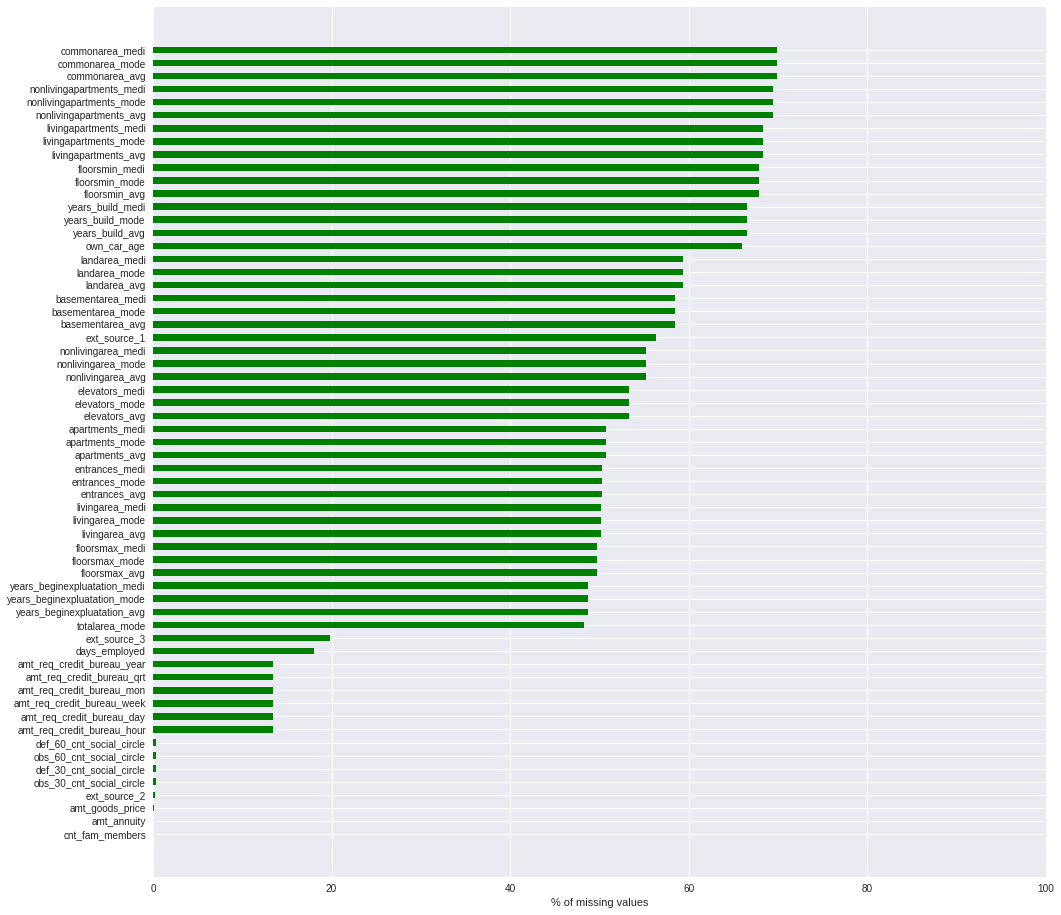

In [45]:
null_visual(X_train)

## Filling null values with insight knowledge

[Discussion for various approaces](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)

[Approaches](https://www.datacamp.com/community/tutorials/categorical-data#encoding)

### own_car_age column
own car age column has more than 66.5% or 202924 rows missing values.We need to fill those values for our machine learning models .
- So we are going to check the flag_own_car vehicle and see how many cases are such that where flag_own_car is is "0" and corresponding own_car_age is "np.nan". For these columns/cases fill the nan values with 0

202929


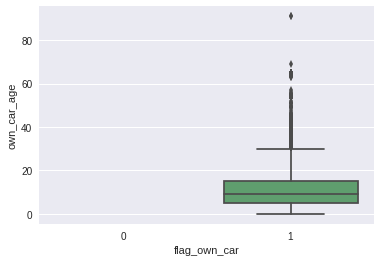

In [46]:
print(X_train['own_car_age'].isna().sum())
sns.boxplot(x = 'flag_own_car',y='own_car_age',data = X_train)
plt.show()

In [47]:
# creating boolean filter
bool_no_car = X_train['flag_own_car'] == 0

#replacing the own_car_age with 0
X_train.loc[bool_no_car,'own_car_age'] = 0
X_test.loc[bool_no_car,'own_car_age'] = 0

print(X_train['own_car_age'].isna().sum()) # own car age is na 

5


In [0]:
#print(X_train['own_car_age'].isna().sum())
#print(X_test['own_car_age'].isna().sum())

#train[train['flag_own_car']== 0]['own_car_age'] = 0  # people dont have car set that age to 0 
                                                      # above line not working 
                                                      # so trying built in method
    
#X_train['own_car_age'].value_counts()# corrected code
#print(X_train['own_car_age'].isna().sum())


### flag own realty 
There are alot of attributes which are related to the property so they need to be filled with the appropriate values  like avg_housearea, avg_lifts etc.

** If the house flag == 0 , a person does not owns house/home/flat .So set all the columns to 0 which are associated with the property/house/apartment**

In [48]:
#print(X_train['flag_own_realty'].value_counts())
#print(X_train['flag_own_realty'].unique())

# example of an attribute to show livingarea_medi is na when there are flag_own realty is 0
bool_no_realty = X_train['flag_own_realty'] == 0
X_train.loc[bool_no_realty,'livingarea_medi'].isna().sum()

48786

In [0]:
# get the columns with mean, mode and median in them
def flag_own_realty(df,dict_):
  labels = list(dict_.keys())
  me_md_mode = []
  for col in labels:
    str_ = str(col)
    if str_.find("medi") == -1:
      pass
    else:
      me_md_mode.append(str_)
    if str_.find("mode") == -1:
      pass
    else: 
      me_md_mode.append(str_)
    if str_.find("avg") == -1:
      pass
    else:
      me_md_mode.append(str_)
 
  for c in me_md_mode:
    #print(c)
    bool_no_realty = df['flag_own_realty'] == 0
    #print('Nan rows before replacement = '+ str(df[c].isna().sum()),end=" ")
  
    # replacing the na values with 0
    #train[train['flag_own_realty'] == 0][c].replace(np.nan,0) ---- not working
    #train[train['flag_own_realty'] == 0]][c].fillna(0,inplace = True) ---- not working
    #df[c] = df[df['flag_own_realty'] == 0][c] = 0
    
    
    df.loc[bool_no_realty,c] = 0
    
  
    # cross checking
    #print('na values are replaced, cross checking by printing the nan count for the same column ')
    #print('Nan row after replacement= '+ str(df[c].isna().sum()))
    #print('------------------------------------------------')

In [0]:
flag_own_realty(X_train,train_dict)
flag_own_realty(X_test,test_dict)

In [51]:
na_dict = null_counter(X_train,48)
sorted_na_train = sorted(na_dict.items(),key =  operator.itemgetter(1))
list_na = list(na_dict.keys())
#list_na

columns having na values greater than 48 are 4


columns having na values greater than 0 are 61


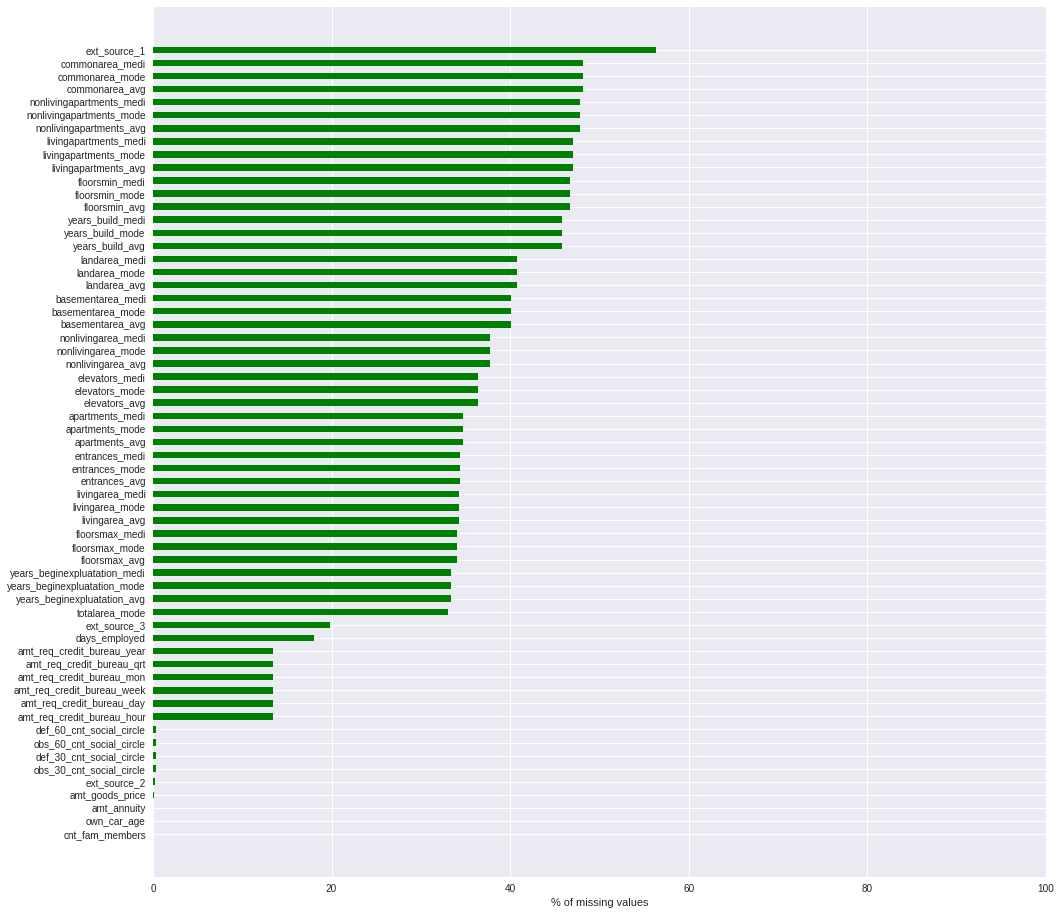

In [52]:
null_visual(X_train)

columns having na values greater than 0 are 0


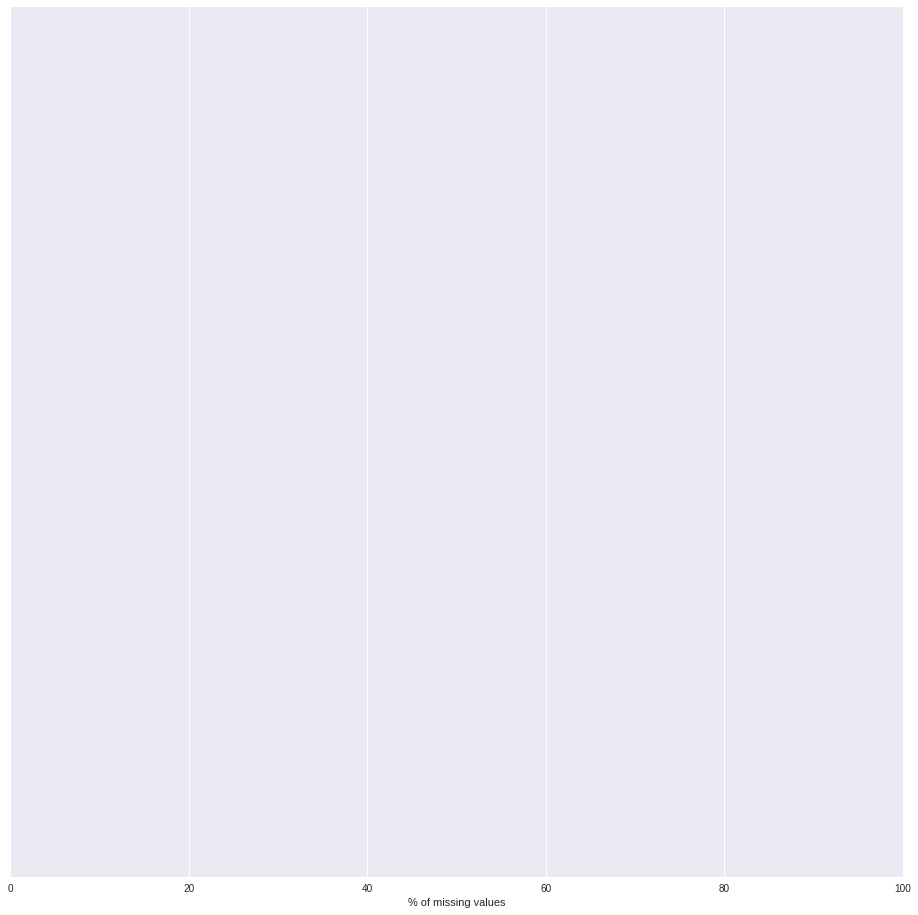

In [92]:
null_visual(X_test)

### box plots

In [0]:
def box_plot(df,cols):
    plt.figure(figsize = (8,16))

    # iterate through the sources
    for i, source in enumerate(cols):
    
      # create a new subplot for each source
      plt.subplot(len(cols), 1, i + 1)
      # plot the whisker plots
      sns.boxplot(y = source,x = 'target',data = df,width = 0.4,fliersize =10)
      #sns.swarmplot(y = source,x = 'target',data = df)
    
      # Label the plots
      plt.title('Distribution of %s' % source)
      #plt.xlabel('%s' % source)
      
    
    plt.tight_layout(h_pad = 2.5)
 

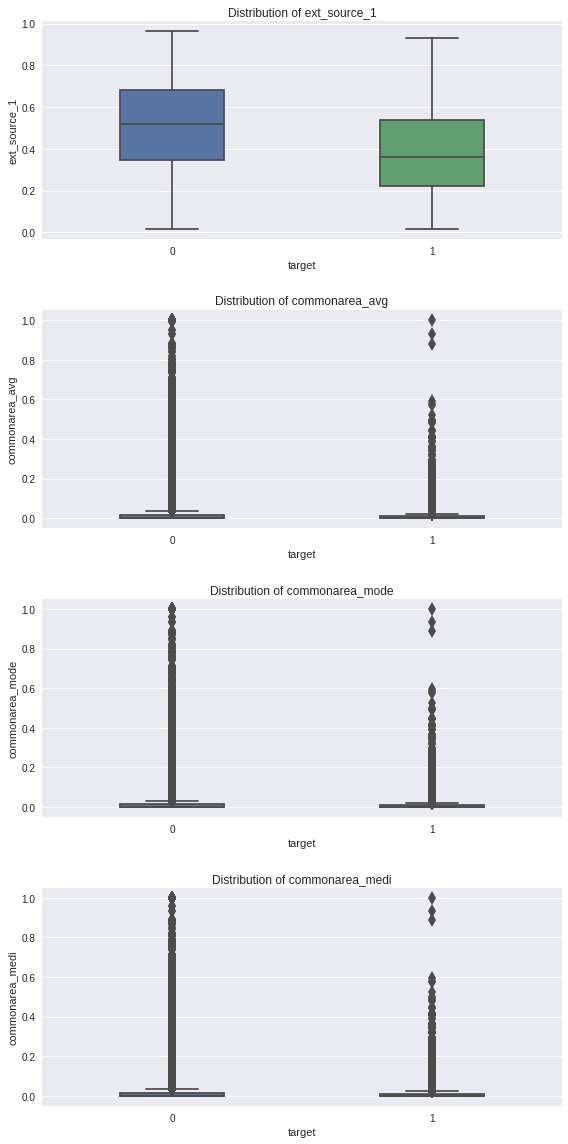

In [55]:
box_plot(X_train,list_na)

**Observation**


1.   ext_source are the normalized variables with no outliers
2.   At first instance the days seems to have many outliers but from the description provided by the kaggle/2 sigma its one of the imporant varible as it denotes 
"How many days before the application the person started current employment". So , I think we should not touch the outliers for time being. 
Lets fill the na values with the median.



## Filling nan values  with median 

In [0]:
#!pip install pandas_profiling
#import pandas_profiling 
#pandas_profiling.ProfileReport(X_train)
def fill_na(df):
  na_dict = null_counter(df,0)
  list_na = list(na_dict.keys())
  
  for c in list_na:
    if df[c].dtype == 'float' or df[c].dtype == 'int':
      df[c] = df[c].fillna(df[c].median())



In [57]:
fill_na(X_train)
fill_na(X_test)

columns having na values greater than 0 are 61
columns having na values greater than 0 are 59


In [58]:
dep = np.arange(1,9)
param_grid = {'max_depth' : dep}
param_grid

{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8])}

## Missingo visualization

[library for missind data visulization](https://https://github.com/ResidentMario/missingno)

In [59]:
!pip install missingno 

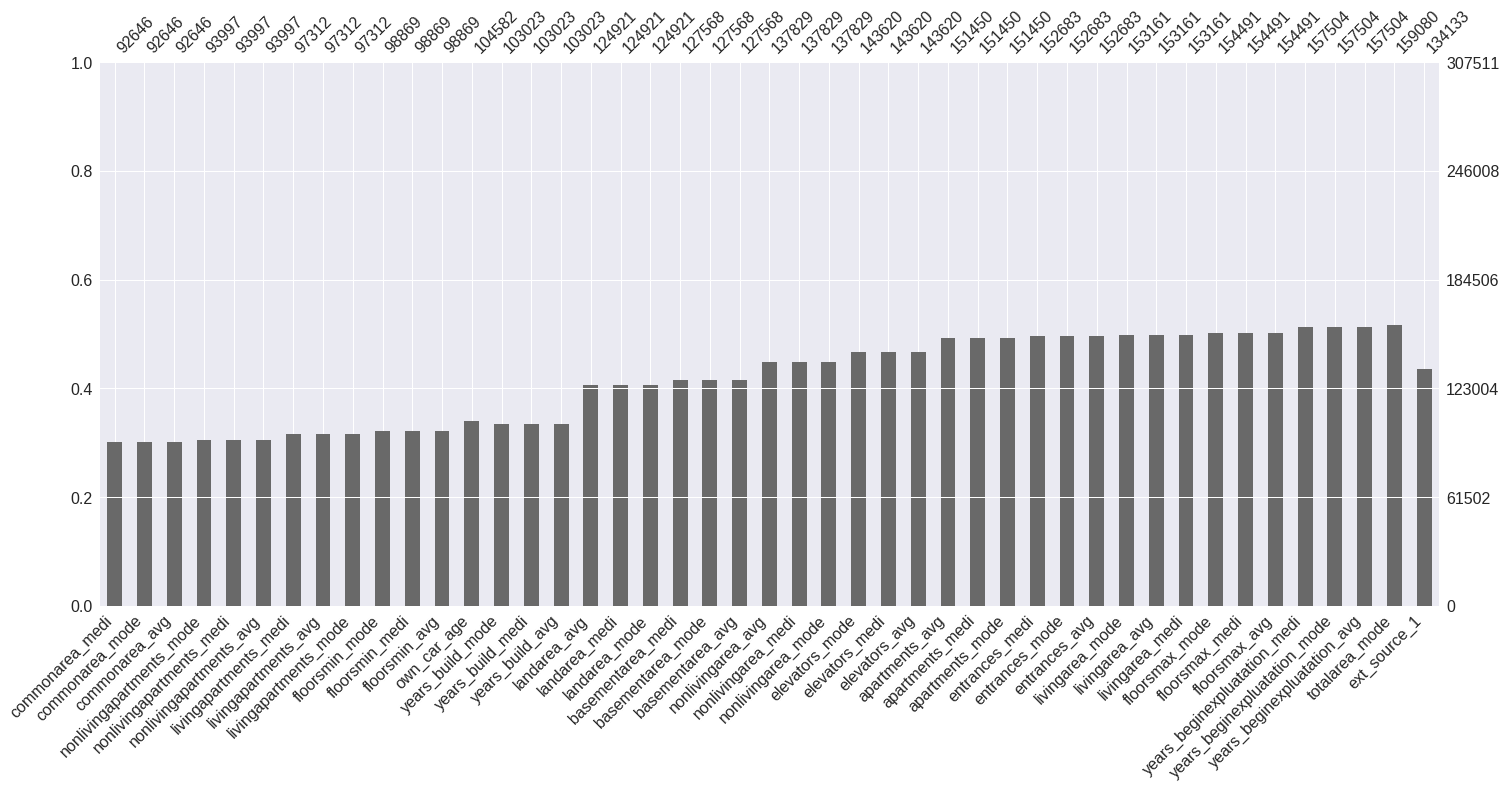

In [60]:
import missingno as msno
msno.bar(m_data)

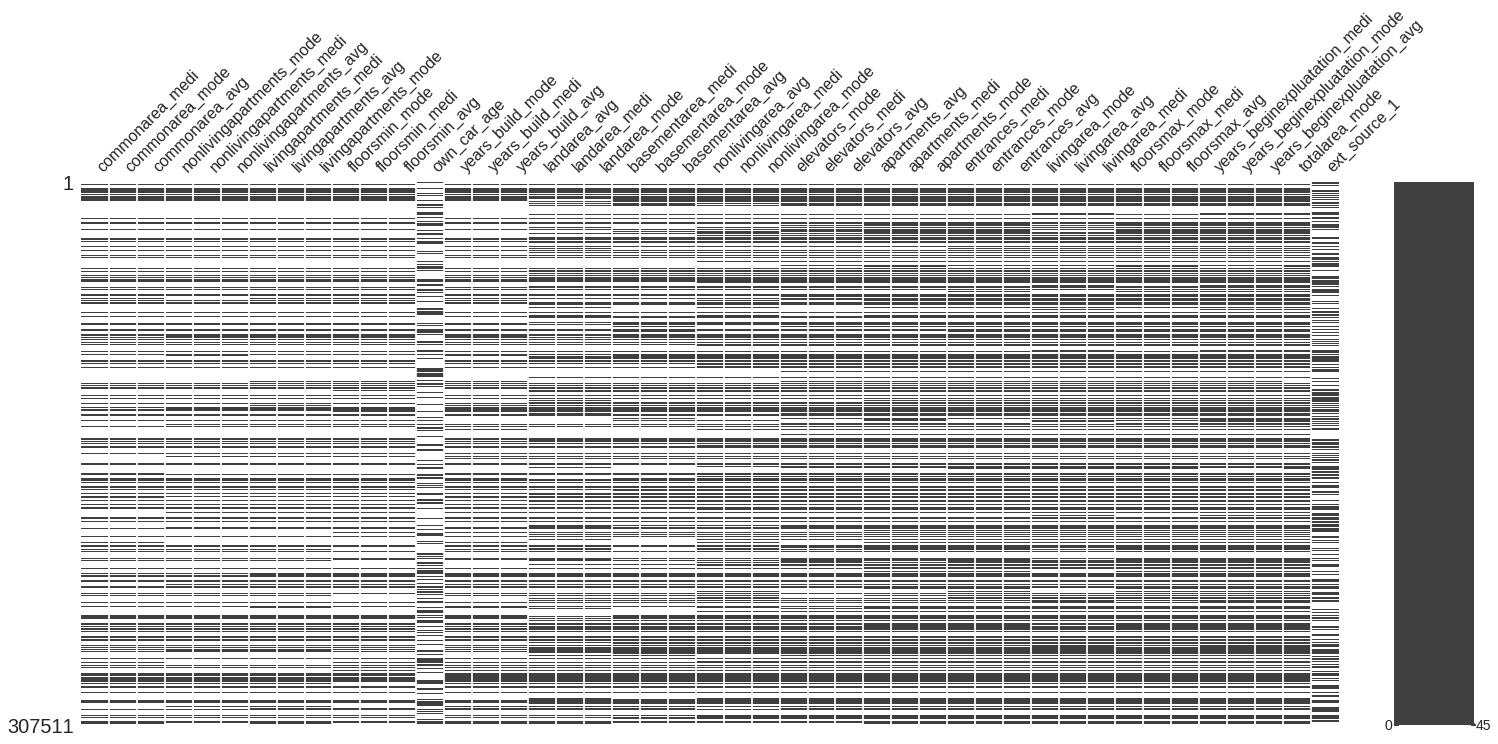

In [61]:
msno.matrix(m_data)

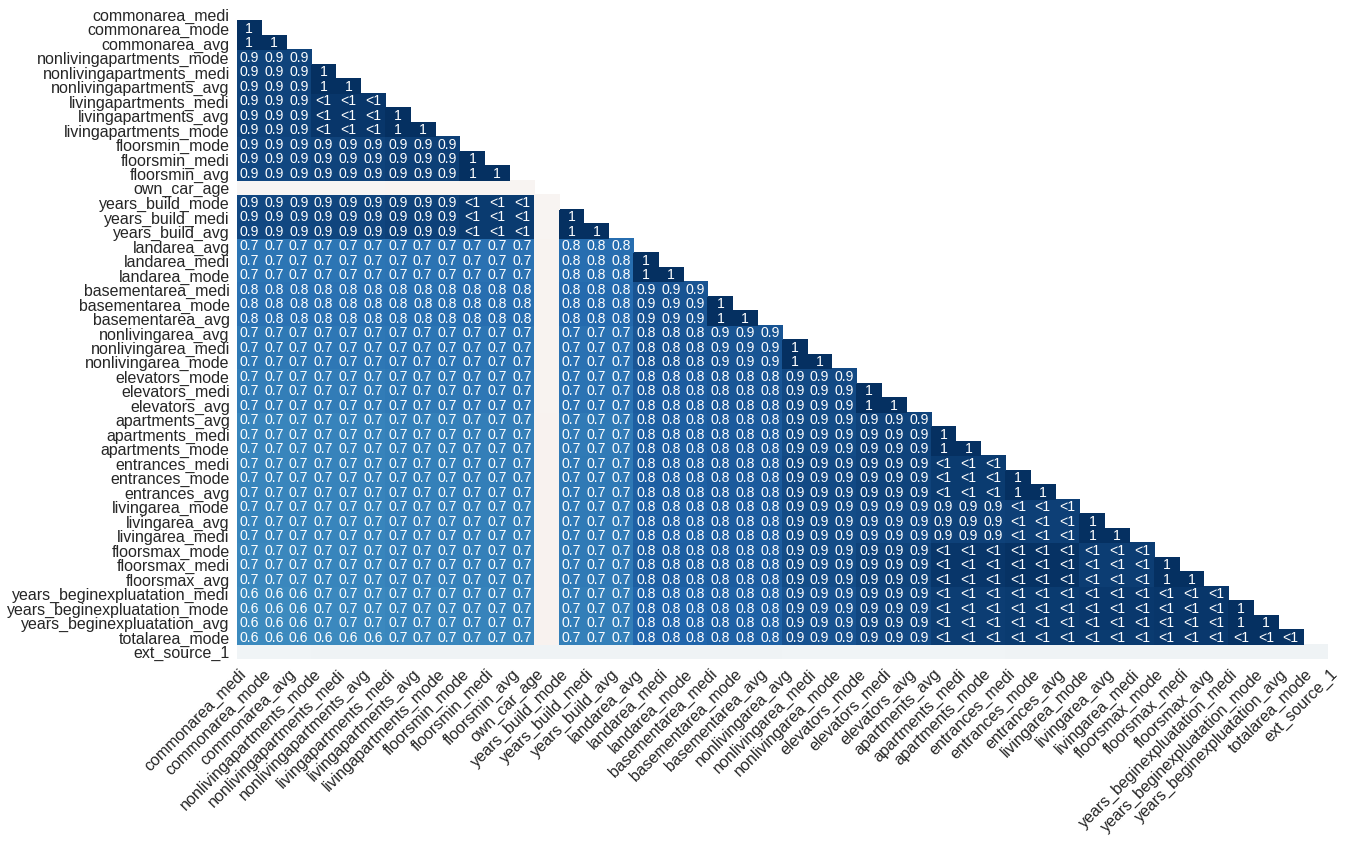

In [62]:
msno.heatmap(m_data)

## Correlations

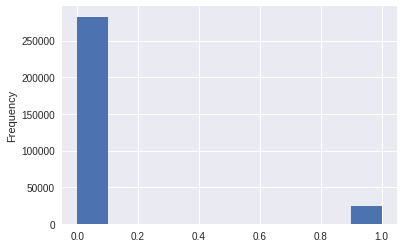

In [63]:
X_train['target'].astype(int).plot.hist();

In [0]:
cors = X_train.corr()['target'].sort_values()


In [65]:
cors.head(5)

ext_source_2                           -0.160295
ext_source_3                           -0.155892
ext_source_1                           -0.098887
days_birth                             -0.078239
name_education_type_Higher education   -0.056593
Name: target, dtype: float64

In [66]:
cors.tail(5)

name_income_type_Working       0.057481
region_rating_client           0.058899
region_rating_client_w_city    0.060893
days_employed                  0.063368
target                         1.000000
Name: target, dtype: float64

**The DAYS_BIRTH is the most negative correlation.
As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.
Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.  **



    .00-.19 “very weak”
    .20-.39 “weak”
    .40-.59 “moderate”
    .60-.79 “strong”
    .80-1.0 “very strong”
The correlation coefficient for both + and - values are given above

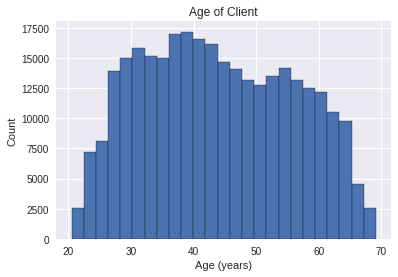

In [67]:
# Plot the distribution of ages in years
plt.hist(X_train['days_birth'] , edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target. A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.


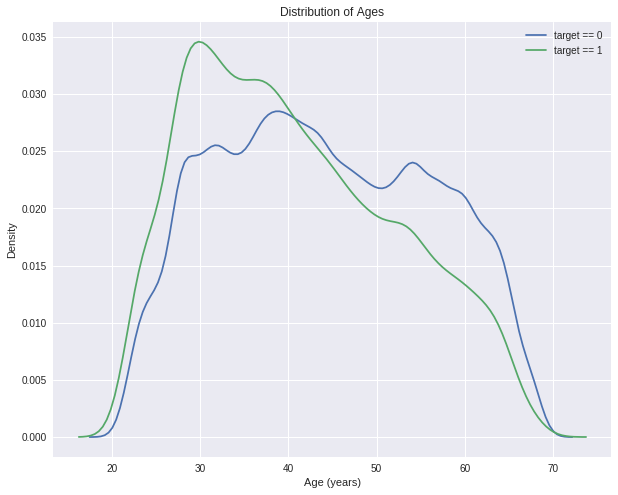

In [68]:

plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(X_train.loc[X_train['target'] == 0, 'days_birth'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(X_train.loc[X_train['target'] == 1, 'days_birth'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

It seems younger client doesn't seems to pay  loan  on time.


**Exterior Sources **

The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". Not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

Let's take a look at these variables.

First, we can show the correlations of the EXT_SOURCE features with the target and with each other.



In [69]:
strong_att = X_train[ ['ext_source_2','ext_source_3','ext_source_1','days_birth','name_education_type_Higher education',
              'days_employed','region_rating_client_w_city','target']]
strong_att_corr = strong_att.corr()
strong_att_corr.head()


,ext_source_2,ext_source_3,ext_source_1,days_birth,name_education_type_Higher education,days_employed,region_rating_client_w_city,target
ext_source_2,1.000000,0.094147,0.134993,0.091947,0.124409,-0.085817,-0.288013,-0.160295
ext_source_3,0.094147,1.000000,0.109100,0.178527,-0.022604,-0.087850,-0.011342,-0.155892
ext_source_1,0.134993,0.109100,1.000000,0.362185,0.094081,-0.131939,-0.077968,-0.098887
days_birth,0.091947,0.178527,0.362185,1.000000,-0.115808,-0.183299,-0.008073,-0.078239
name_education_type_Higher education,0.124409,-0.022604,0.094081,-0.115808,1.000000,-0.010427,-0.067580,-0.056593


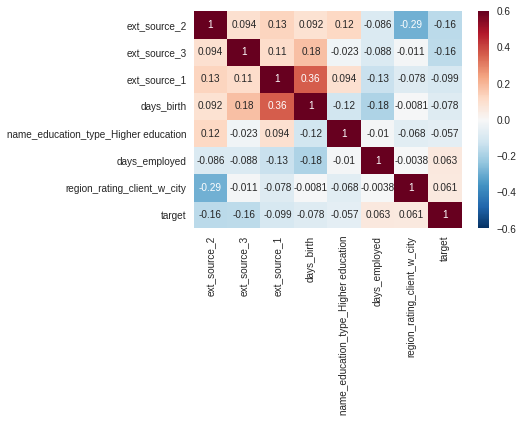

In [70]:
sns.heatmap(strong_att_corr, vmin = -0.25, annot = True, vmax = 0.6)

[]

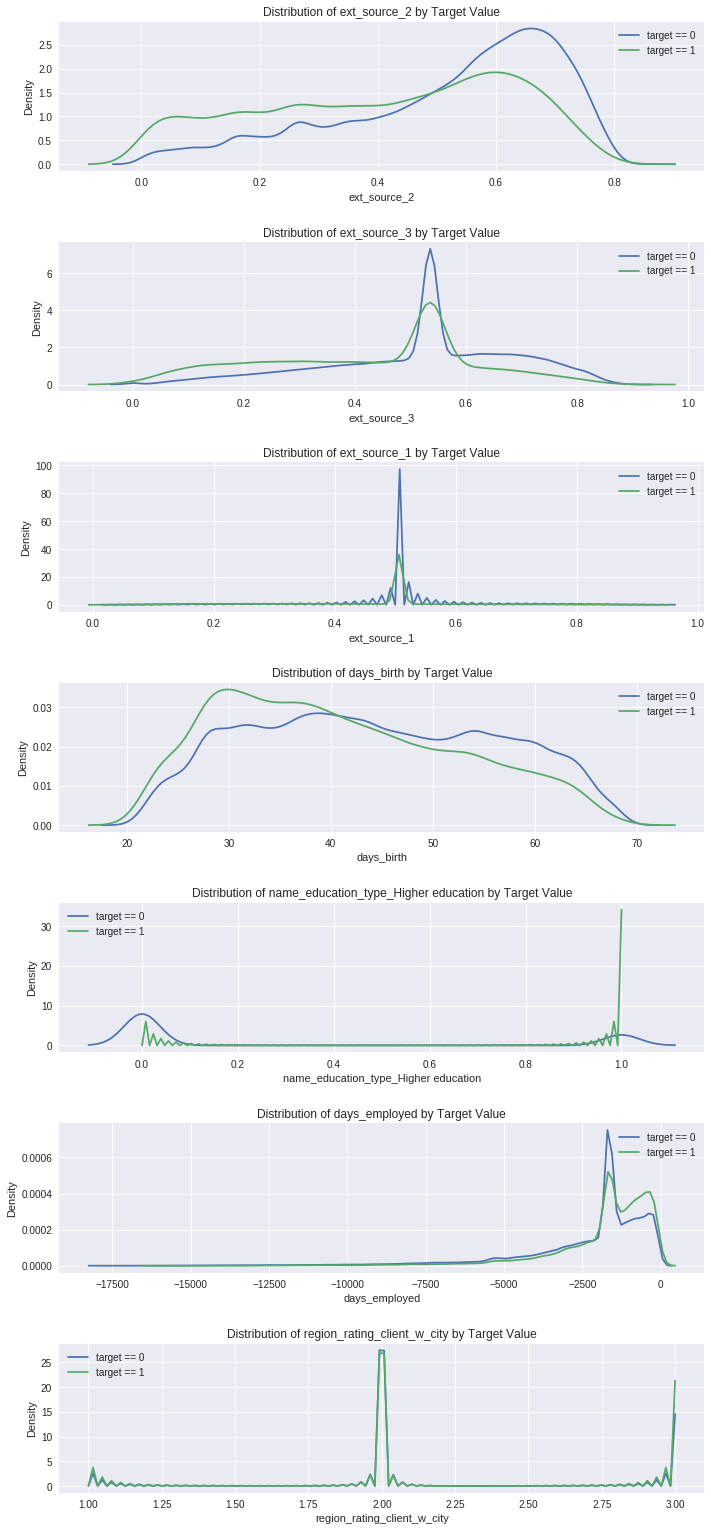

In [71]:
plt.figure(figsize=(10,24))
list_1 = ['ext_source_2','ext_source_3','ext_source_1','days_birth','name_education_type_Higher education',
              'days_employed','region_rating_client_w_city']
for i , source in enumerate(list_1):
  plt.subplot(8,1,i + 1)
  sns.kdeplot(X_train.loc[X_train['target'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
  sns.kdeplot(X_train.loc[X_train['target'] == 1, source], label = 'target == 1')
    
    # Label the plots
  plt.title('Distribution of %s by Target Value' % source)
  plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
plt.plot()

In [72]:
ext_data = X_train[['target', 'ext_source_1', 'ext_source_2', 'ext_source_3', 'days_birth']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,target,ext_source_1,ext_source_2,ext_source_3,days_birth
target,1.000000,-0.098887,-0.160295,-0.155892,-0.078239
ext_source_1,-0.098887,1.000000,0.134993,0.109100,0.362185
ext_source_2,-0.160295,0.134993,1.000000,0.094147,0.091947
ext_source_3,-0.155892,0.109100,0.094147,1.000000,0.178527
days_birth,-0.078239,0.362185,0.091947,0.178527,1.000000


All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1


[]

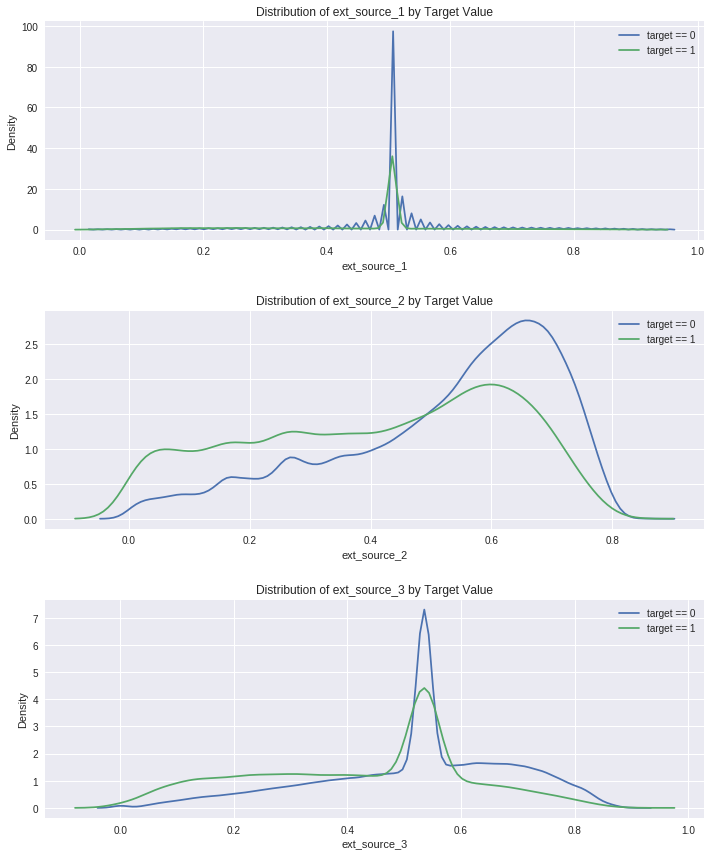

In [73]:
plt.figure(figsize=(10,12))
list_2 = ['ext_source_1', 'ext_source_2', 'ext_source_3']
for i , source in enumerate(list_2):
  plt.subplot(3,1,i + 1)
  sns.kdeplot(X_train.loc[X_train['target'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
  sns.kdeplot(X_train.loc[X_train['target'] == 1, source], label = 'target == 1')
    
    # Label the plots
  plt.title('Distribution of %s by Target Value' % source)
  plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
plt.plot()

## **Feature engineering**

We will do a lot of feature engineering when we start using the other data sources, but in this notebook we will try only two simple feature construction methods:

    Polynomial features
    Domain knowledge features


In [74]:
# Make a new dataframe for polynomial features
poly_features = X_train[['ext_source_1', 'ext_source_2', 'ext_source_3','days_birth','target']]
poly_features_test = X_test[['ext_source_1', 'ext_source_2', 'ext_source_3','days_birth']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['target']

poly_features = poly_features.drop(columns = ['target'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)



Polynomial Features shape:  (307511, 35)


In [75]:
poly_transformer.get_feature_names(input_features=['ext_source_1', 'ext_source_2', 'ext_source_3','days_birth'])

['1',
 'ext_source_1',
 'ext_source_2',
 'ext_source_3',
 'days_birth',
 'ext_source_1^2',
 'ext_source_1 ext_source_2',
 'ext_source_1 ext_source_3',
 'ext_source_1 days_birth',
 'ext_source_2^2',
 'ext_source_2 ext_source_3',
 'ext_source_2 days_birth',
 'ext_source_3^2',
 'ext_source_3 days_birth',
 'days_birth^2',
 'ext_source_1^3',
 'ext_source_1^2 ext_source_2',
 'ext_source_1^2 ext_source_3',
 'ext_source_1^2 days_birth',
 'ext_source_1 ext_source_2^2',
 'ext_source_1 ext_source_2 ext_source_3',
 'ext_source_1 ext_source_2 days_birth',
 'ext_source_1 ext_source_3^2',
 'ext_source_1 ext_source_3 days_birth',
 'ext_source_1 days_birth^2',
 'ext_source_2^3',
 'ext_source_2^2 ext_source_3',
 'ext_source_2^2 days_birth',
 'ext_source_2 ext_source_3^2',
 'ext_source_2 ext_source_3 days_birth',
 'ext_source_2 days_birth^2',
 'ext_source_3^3',
 'ext_source_3^2 days_birth',
 'ext_source_3 days_birth^2',
 'days_birth^3']

There are 35 features with individual features raised to powers up to degree 3 and interaction terms. Now, we can see whether any of these new features are correlated with the target.

In [76]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(input_features=['ext_source_1', 'ext_source_2', 'ext_source_3','days_birth']))

# Add in the target
                             
                             
poly_features['target'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['target'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))



ext_source_2 ext_source_3                -0.193939
ext_source_1 ext_source_2 ext_source_3   -0.189605
ext_source_2 ext_source_3 days_birth     -0.181283
ext_source_2^2 ext_source_3              -0.176428
ext_source_2 ext_source_3^2              -0.172282
ext_source_1 ext_source_2                -0.166625
ext_source_1 ext_source_3                -0.164065
ext_source_2                             -0.160295
ext_source_2 days_birth                  -0.156873
ext_source_1 ext_source_2^2              -0.156867
Name: target, dtype: float64
days_birth     -0.078239
days_birth^2   -0.076672
days_birth^3   -0.074273
target          1.000000
1                    NaN
Name: target, dtype: float64




Several of the new variables have a greater (in terms of absolute magnitude) correlation with the target than the original features. When we build machine learning models, we can try with and without these features to determine if they actually help the model learn.

We will add these features to a copy of the training and testing data and then evaluate models with and without the features. Many times in machine learning, the only way to know if an approach will work is to try it out!


In [77]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(input_features=['ext_source_1', 'ext_source_2', 'ext_source_3','days_birth']))

# Merge polynomial features into training dataframe
poly_features['sk_id_curr'] = X_train['sk_id_curr']
app_train_poly = X_train.merge(poly_features, on = 'sk_id_curr', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['sk_id_curr'] = X_test['sk_id_curr']
app_test_poly = X_test.merge(poly_features_test, on = 'sk_id_curr', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 261)
Testing data with polynomial features shape:   (48744, 261)



Domain Knowledge Features

Maybe it's not entirely correct to call this "domain knowledge" because I'm not a credit expert, but perhaps we could call this "attempts at applying limited financial knowledge". In this frame of mind, we can make a couple features that attempt to capture what we think may be important for telling whether a client will default on a loan. Here I'm going to use five features that were inspired by this script by Aguiar:

    CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
    ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
    CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
    DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

Again, thanks to Aguiar and his great script for exploring these features.


In [0]:
# data frame columns to upper case
X_train.rename(str.upper, axis='columns',inplace=True,copy=True)
X_test.rename(str.upper, axis='columns',inplace=True,copy=True)

In [0]:
app_train_domain = X_train.copy()
app_test_domain = X_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [0]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

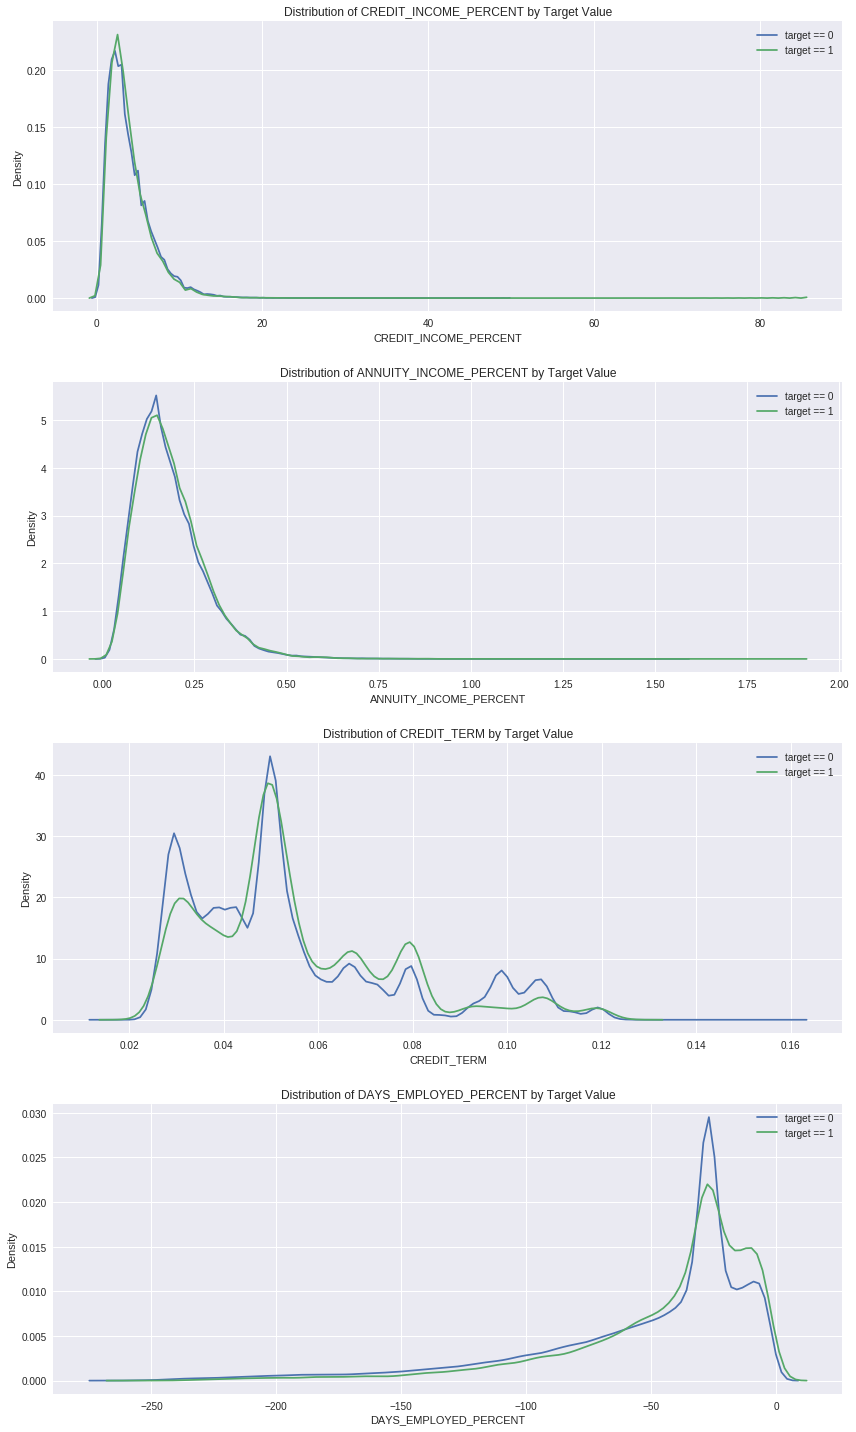

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

# Applying the models 

## Preprocssing of data and Plot functions

In [0]:
from sklearn.preprocessing import MinMaxScaler, Imputer
from sklearn.model_selection import train_test_split


# Drop the target from the training data
def pre_pro(train,test):
  # setting train_labels
  train_labels = train['TARGET']
  # dropping target
  train = train.drop(['TARGET'],axis = 1)
  print('Training data shape: ', train.shape)
  print('Testing data shape: ',  test.shape)
  

  # Feature names
  features = list(train.columns)

  # Copy of the testing data
  #test = test.copy()

  # Median imputation of missing values
  imputer = Imputer(strategy = 'median')

  # Scale each feature to 0-1
  scaler = MinMaxScaler(feature_range = (0, 1))

  # Fit on the training data
  imputer.fit(train)

  # Transform both training and testing data
  train = imputer.transform(train)
  test = imputer.transform(test)

  # Repeat with the scaler
  scaler.fit(train)
  train = scaler.transform(train)
  test = scaler.transform(test)

  # training , validation,  
  train, val, y_train, y_val = train_test_split(train, train_labels, test_size=0.20, random_state=42)
  print('Training data shape: ', train.shape)
  print('Training data Y shape: ', y_train.shape)
  print('Validation data shape: ', val.shape)
  print('Validation data shape: ', y_val.shape)
  print('Testing data shape: ',  test.shape)
  
  return train,val,y_train,y_val,test

In [0]:
df = X_train.drop(['TARGET'],axis = 1)
feature = df.columns

In [136]:
app_train.rename(str.upper, axis='columns',inplace=True,copy=True)
app_test.rename(str.upper, axis='columns',inplace=True,copy=True)
train,val,y_train,y_val,test = pre_pro(app_train,app_test) 

Training data shape:  (307511, 226)
Testing data shape:  (48744, 226)
Training data shape:  (246008, 226)
Training data Y shape:  (246008,)
Validation data shape:  (61503, 226)
Validation data shape:  (61503,)
Testing data shape:  (48744, 226)


In [137]:
X_train.rename(str.upper, axis='columns',inplace=True,copy=True)
X_test.rename(str.upper, axis='columns',inplace=True,copy=True)
train,val,y_train,y_val,test = pre_pro(X_train,X_test) 

Training data shape:  (307511, 226)
Testing data shape:  (48744, 226)
Training data shape:  (246008, 226)
Training data Y shape:  (246008,)
Validation data shape:  (61503, 226)
Validation data shape:  (61503,)
Testing data shape:  (48744, 226)


In [0]:
def plot_roc_curve(model):
  '''model is the classifier
  the function plots the prediction on training and val data set'''
  plt.figure(figsize=(5, 5))
  #predictions
  train_pred = model.predict_proba(train)[:, 1]
  val_pred = model.predict_proba(val)[:, 1]
  # roc value'
  fpr_t,tpr_t, th = roc_curve(y_train,train_pred)
  fpr, tpr, th = roc_curve(y_val, val_pred)
  plt.plot(fpr_t, tpr_t, linewidth=2, label='ROC train (area = %0.5f)' % roc_auc_score(y_train, train_pred))
  plt.plot(fpr, tpr, linewidth=2,color='darkorange', label='ROC test(area = %0.5f)' % roc_auc_score(y_val, val_pred))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate', fontsize=10)
  plt.ylabel('True Positive Rate', fontsize=10)
  plt.legend(loc="lower right")
  plt.show()
  return 
 
def submission(model,name ):
  # Make predictions on the test data
  test_pred = model.predict_proba(test)[:, 1]

  # Make a submission dataframe
  submit = app_test[['SK_ID_CURR']]
  submit['TARGET'] = test_pred
  try:
    f_name = model.solver
  except AttributeError as e:
    f_name = name
    
  submit.to_csv(f_name,index = False)
  # Save the submission dataframe
  # below lines download the file saved in your colab sample data folder
  from google.colab import files
  files.download(f_name)
  return
 

In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

def plot_precision_recall(model,train):
  '''model, the classifier which is already trained
  '''
  # decision function for scores
  y_train_scores = model.predict_proba( train )[:,1]
  y_val_scores = model.predict_proba( val )[:,1]
  
  p_train, r_train, th_train = precision_recall_curve(y_train, y_train_scores)
  p_val,r_val,th_val = precision_recall_curve(y_val, y_val_scores)
  # plotting roc curve
  
  plt.figure(figsize=(8, 4))
  # plotting train_roc
  plt.plot(th_train, p_train[:-1], "b--", label="train_precision", linewidth=2)
  plt.plot(th_train, r_train[:-1], "b--", label="train_recall", linewidth=2)
  #plotting val_roc
  #plt.plot(th_val, p_val[:-1], "g-", label="val_precision", linewidth=2)
  #plt.plot(th_val, r_val[:-1], "g-", label="val_recall", linewidth=2)
  
  plt.xlabel("Threshold", fontsize=16)
  plt.legend(loc="upper left", fontsize=16)
  plt.ylim([0, 1])
  plt.xlim([-700000, 700000])
  #save_fig("precision_recall_vs_threshold_plot")
  plt.show()
  return 
  
 
  
  
  

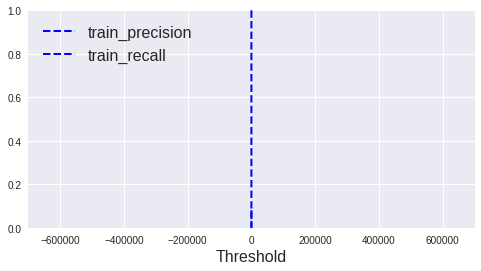

In [196]:
plot_precision_recall(log_reg,train)

## LogisticRegression

In [142]:
from sklearn.linear_model import LogisticRegression
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)
log_reg_1 = LogisticRegression(C = 0.0001)

log_reg.fit(train,y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

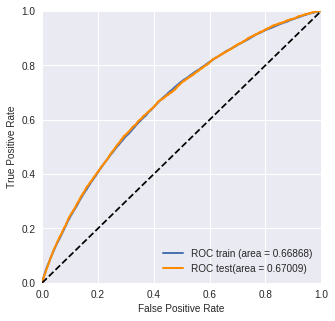

In [143]:
plot_roc_curve(log_reg)
submission(log_reg,'logistic_reg')  


## **Random** **forest**

In [97]:
from sklearn.ensemble import RandomForestClassifier
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1)

# Train on the training data
train_labels = y_train 
random_forest.fit(train, train_labels)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.8s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished


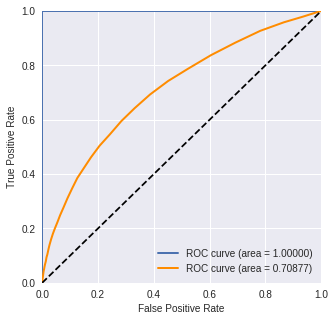

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished


In [321]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})


plot_roc_curve(random_forest)
submission(random_forest)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished


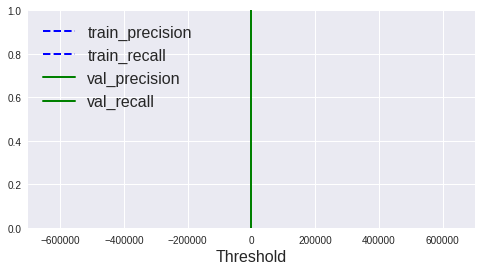

In [192]:
plot_precision_recall(random_forest,train)

## **Ensemble models**

###**Bagging and Pasting**

In [161]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(  DecisionTreeClassifier(random_state = 123), 
                              n_estimators = 100,
                              max_samples = 50000, bootstrap=False, 
                              random_state=42)

bag_clf.fit(train, train_labels)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=50000, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

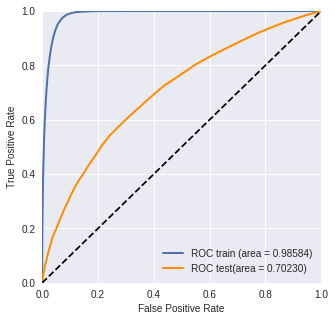

In [162]:
plot_roc_curve(bag_clf)
submission(bag_clf,'bagging')

 

## **Boosting** 

### Adaboost

In [331]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
                            DecisionTreeClassifier(max_depth=1), n_estimators=200,
                            algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(train,train_labels)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

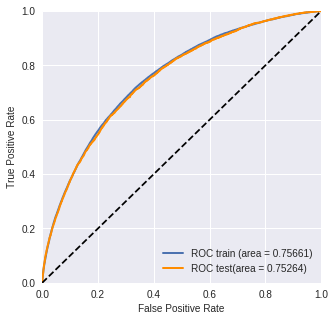

In [332]:
plot_roc_curve(ada_clf)
submission(ada_clf,'ada_boost')

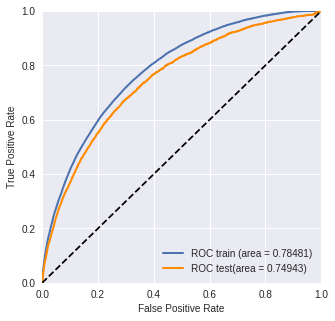

In [333]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
                            DecisionTreeClassifier(max_depth=3), n_estimators= 100,
                            algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(train,train_labels)



plot_roc_curve(ada_clf)
submission(ada_clf,'ada_boost_regularized')

### Gradient Boosting

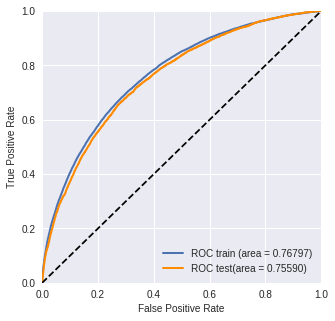

In [164]:
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier(max_depth=3, n_estimators=200, learning_rate= 0.1, random_state=42)

gbr.fit(train,train_labels)


plot_roc_curve(gbr)
submission(gbr,'gbr')

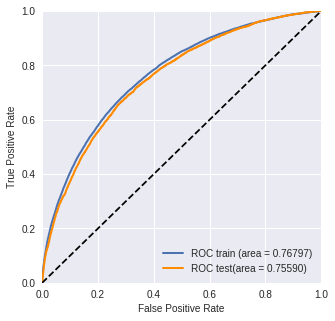

In [165]:
gbr = GradientBoostingClassifier(max_depth=3,
                                 n_estimators=200, 
                                 learning_rate= 0.1, 
                                 random_state=42,
                                 loss = 'deviance', 
                                 warm_start= 'True')

gbr.fit(train,train_labels)


plot_roc_curve(gbr)
submission(gbr,'gbr')

### Xg boost 

In [173]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(train, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

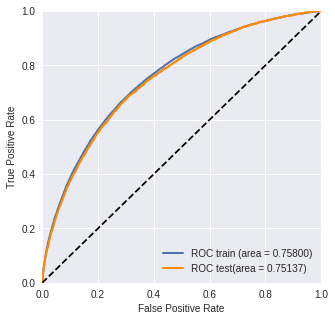

In [174]:
plot_roc_curve(xgb_clf)
submission(xgb_clf,'xgb')

In [175]:
# Xg boost regulaized
#Choose all predictors except target & IDcols

xgb_reg = XGBClassifier(  learning_rate =0.1,
                          n_estimators=1000,
                          max_depth=5,
                          min_child_weight=1,
                          gamma=0,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          objective= 'binary:logistic',
                          nthread=4,
                          scale_pos_weight=1,
                          seed=123)
xgb_reg.fit(train,train_labels)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=0.8)

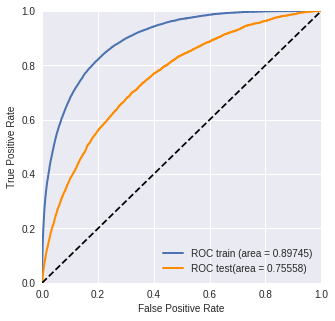

In [176]:
plot_roc_curve(xgb_reg)
submission(xgb_reg,'xgb')

 ## ** Neural Network/MLP**

In [177]:
#Neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(239,100,50,25), max_iter=100, alpha=1e-4,
                solver='sgd', verbose= True, tol=1e-4, random_state=1,learning_rate ='adaptive',
                    early_stopping= True,
                    learning_rate_init=.1)
mlp.fit(train,train_labels)



Iteration 1, loss = 0.25785414
Validation score: 0.916629
Iteration 2, loss = 0.25275149
Validation score: 0.916629
Iteration 3, loss = 0.25186376
Validation score: 0.916629
Iteration 4, loss = 0.25127236
Validation score: 0.916629
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.020000
Iteration 5, loss = 0.24882867
Validation score: 0.916629
Iteration 6, loss = 0.24843267
Validation score: 0.916589
Iteration 7, loss = 0.24815241
Validation score: 0.916589
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.004000
Iteration 8, loss = 0.24719824
Validation score: 0.916507
Iteration 9, loss = 0.24692956
Validation score: 0.916386
Iteration 10, loss = 0.24678597
Validation score: 0.916345
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000800
Iteration 11, loss = 0.24644832
Validation score: 0.916304
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(239, 100, 50, 25), learning_rate='adaptive',
       learning_rate_init=0.1, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

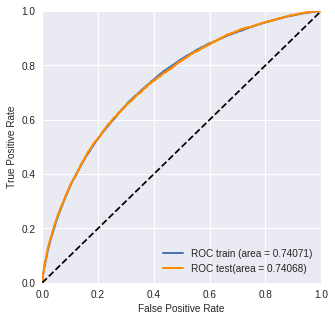

In [178]:

plot_roc_curve(mlp)
submission(mlp,'mlp')

## **Voting Classifiers**

In [0]:
#simple voting classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

# Gather a set of predictors
estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]

# Initialize the Voting Classifier
voting_clf = VotingClassifier(estimators=estimators,voting='soft')

# Fit the data with all the classifier
voting_clf.fit(train, train_labels)


In [0]:
plot_roc_curve(voting_clf)
submission(voting_clf,'simple_voting_clf')

###  Voting classifer with best performing algos

In [66]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

gbr = GradientBoostingClassifier(max_depth=3, n_estimators=200, learning_rate= 0.1, random_state=42,
                           loss = 'deviance', warm_start= 'True')

ada_clf = AdaBoostClassifier(
                            DecisionTreeClassifier(max_depth=3), n_estimators= 100,
                            algorithm="SAMME.R", learning_rate=0.5, random_state=42)

log_clf = LogisticRegression()

mlp = MLPClassifier(hidden_layer_sizes=(239,100,50,25), max_iter=100, alpha=1e-4,
                solver='sgd', verbose=10, tol=1e-4, random_state=1,learning_rate ='adaptive',
                    early_stopping= True,
                    learning_rate_init=.1)

xg_boost = XGBClassifier()
# Gather a set of predictors
estimators = [('lr', log_clf), ('gbr', gbr), ('ada_clf', ada_clf),('xg_boost',xg_boost),('mlp',mlp)]

# Initialize the Voting Classifier
voting_clf = VotingClassifier(estimators=estimators,voting='soft', weights=[1,2,2,2,2])


# Fit the data with all the classifier
voting_clf.fit(train, train_labels)






Iteration 1, loss = 0.25902827
Validation score: 0.921338
Iteration 2, loss = 0.25367132
Validation score: 0.921338
Iteration 3, loss = 0.25281506
Validation score: 0.921338
Iteration 4, loss = 0.25233934
Validation score: 0.921338
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.020000
Iteration 5, loss = 0.25029056
Validation score: 0.921273
Iteration 6, loss = 0.24991503
Validation score: 0.921273
Iteration 7, loss = 0.24962302
Validation score: 0.921338
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.004000
Iteration 8, loss = 0.24882711
Validation score: 0.921176
Iteration 9, loss = 0.24866941
Validation score: 0.921176
Iteration 10, loss = 0.24856429
Validation score: 0.921208
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000800
Iteration 11, loss = 0.24831479
Validation score: 0.921208
Iterat

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('gbr', Gradie...ue,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[1, 2, 2, 2, 2])

In [67]:
# Make predictions on the test data and the validation data
plot_roc_curve(voting_clf)
# downloading the submissio file
submission(voting_clf,'voting_clf')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## Stacking

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split( train, train_labels, random_state= 1 )

In [0]:
estimators = [log_clf, gbr, ada_clf, xg_boost, mlp]

#first train the models
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

In [81]:
from sklearn.ensemble import RandomForestClassifier
X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)
    
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state = 1,max_features = "auto",
                                            min_samples_leaf = 50)
rnd_forest_blender.fit(X_val_predictions, y_val)  


rnd_forest_blender.oob_score_

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9185982986029814

In [82]:
X_test_predictions = np.empty((len(test), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(test)
    
#predecting values
predictions = rnd_forest_blender.predict(X_test_predictions)

# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('stacking_1.csv', index = False)

from google.colab import files
files.download('stacking_1.csv')



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [86]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg_blender = LogisticRegression(C = 0.0001)


    
#fitting the model
log_reg_blender.fit(X_val_predictions, y_val)
#log_reg_blender.fit(

predictions = log_reg_blender.predict(X_test_predictions) # calculaed above

# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('stacking_4.csv', index = False)

from google.colab import files
files.download('stacking_4.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [0]:
!pip install git+https://github.com/viisar/brew.git

In [0]:
    import brew
    from brew.base import Ensemble
    from brew.combination.combiner import Combiner
    from brew.stacking.stacker import EnsembleStack
    from brew.stacking.stacker import EnsembleStackClassifier
    from sklearn.ensemble import  ExtraTreesClassifier
    layer_1 = [SVC(probability=True),
               XGBClassifier(max_depth=6,n_estimators=100),
               RandomForestClassifier(n_estimators=100), 
               ExtraTreesClassifier(n_estimators=100)]
     
    layer_2 = [SVC(probability=True), LogisticRegression(max_iter=500)]
     
    stack = EnsembleStack(cv=10) # number of folds per layer
    stack.add_layer(Ensemble(layer_1))
    stack.add_layer(Ensemble(layer_2))
     
    clf = EnsembleStackClassifier(stack, Combiner('mean'))
     
    # load your data here
    X_train, X_val, y_train, y_val = train_test_split( train, train_labels, random_state= 1 )
     
    clf.fit(X_train, y_train)
    clf.predict_proba(test)

## Light Gradient Boosting Machine

In [61]:
!pip install lightgbm

    100% |████████████████████████████████| 1.1MB 7.5MB/s 


In [0]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features) # only for categorical variables
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics


In [63]:
submission, fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 238)
Testing Data Shape:  (48744, 238)
Training until validation scores don't improve for 100 rounds.
[200]	valid's binary_logloss: 0.563125	valid's auc: 0.754949	train's binary_logloss: 0.552616	train's auc: 0.79887
Early stopping, best iteration is:
[208]	valid's binary_logloss: 0.562275	valid's auc: 0.755109	train's binary_logloss: 0.551442	train's auc: 0.80025
Training until validation scores don't improve for 100 rounds.
[200]	valid's binary_logloss: 0.563478	valid's auc: 0.758539	train's binary_logloss: 0.553271	train's auc: 0.798518
Early stopping, best iteration is:
[217]	valid's binary_logloss: 0.561731	valid's auc: 0.758619	train's binary_logloss: 0.55077	train's auc: 0.801374
Training until validation scores don't improve for 100 rounds.
[200]	valid's binary_logloss: 0.564247	valid's auc: 0.762652	train's binary_logloss: 0.553987	train's auc: 0.79774
[400]	valid's binary_logloss: 0.546577	valid's auc: 0.762202	train's binary_logloss: 0.527866	t

In [0]:
submission.to_csv('baseline_lgb.csv', index = False)
files.download('baseline_lgb.csv')